##  FASE I: EXPLORACIÓN Y LIMPIEZA

# Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos archivos .csv

In [5]:
df_flight=pd.read_csv("documentacion/Customer_Flight_Activity.csv")
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [6]:
df_loyalty=pd.read_csv("documentacion/Customer_Loyalty_History.csv")
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [9]:
# ¿Cuántas filas y columnas tenemos?
print("Dataset de Flights:")
print(f"Filas: {df_flight.shape[0]}")
print(f"Columnas: {df_flight.shape[1]}")

print("\nDataset de Loyalty:")
print(f"Filas: {df_loyalty.shape[0]}")
print(f"Columnas: {df_loyalty.shape[1]}")

Dataset de Flights:
Filas: 405624
Columnas: 10

Dataset de Loyalty:
Filas: 16737
Columnas: 16


# Buscamos valores Nulos

In [10]:
df_flight.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [11]:
df_loyalty.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

Tengo tres cou¡lumnas en loyalty con valores nulos Salary, cancellation Year y Cancellation Month

In [12]:
# que % de filas tienen valor null?
print(f"Total de filas en loyalty: {df_loyalty.shape[0]}")
print(f"Filas con Salary nulo: {df_loyalty['Salary'].isnull().sum()}")
print(f"Porcentaje de nulos: {(df_loyalty['Salary'].isnull().sum() / df_loyalty.shape[0]) * 100:.2f}%")

Total de filas en loyalty: 16737
Filas con Salary nulo: 4238
Porcentaje de nulos: 25.32%


El % parece muy alto como para borrarlas de un plumazo, vamos a rellenar el valor con la media de la columna

In [14]:
df_loyalty['Salary'] = df_loyalty['Salary'].fillna(df_loyalty['Salary'].mean())

In [15]:
df_loyalty.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                    0
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

Las columnas de cancellation que siguen teniendo nulos entiendo que son vuelos que no se han cancelado, de momento no las voy a borrar

# Ahora busco duplicados

In [16]:
df_loyalty['Loyalty Number'].duplicated().sum()

np.int64(0)

In [18]:
df_flight['Loyalty Number'].duplicated().sum()

np.int64(388887)

Entiendo que el loyalty number es el numero de cliente que puede haber cogido muhcos vuelos con lo que es lógico que se repita el valor

# Hacemos el merge de los dos archivos

In [20]:
df_merged = df_flight.merge(df_loyalty, on='Loyalty Number', how='left')
df_merged.shape

(405624, 25)

Tenemos un archivo de unificado 405624 lineas y 25 columnas

### FASE II: ANÁLISIS ESTADÍSTICO

# Estadística descriptiva

In [21]:
df_merged.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,50064.000000,50064.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503,79262.949355,7991.976226,2015.252529,6.668008,2016.499521,6.966443
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038,30240.944817,6863.663857,1.979427,3.399766,1.384336,3.448300
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63899.000000,3985.320000,2014.000000,4.000000,2016.000000,4.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000,79245.609409,5776.340000,2015.000000,7.000000,2017.000000,7.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000,82940.000000,8936.820000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


# Outliers- Valores Atípicos

Lo voy a hacer para las columnas que considero relevantes, Distance,salary, Points accumulated, flights booked, CLV
Podría ir una a una pero voy a hacer un bucle para que me saque todas a la vez

Primero lo hago de manera numérica, en la fase III lo haré con gráficos
IQR Rango Intercuartílico
Los cuartiles dividen los datos en 4 partes:

Q1 (cuartil 1) = 25% de los datos
Q2 (mediana) = 50% de los datos
Q3 (cuartil 3) = 75% de los datos

IQR = Q3 - Q1 (la distancia entre Q3 y Q1)
La regla dice que un valor es outlier si:

Es menor que: Q1 - 1.5 × IQR (muy bajo)
Es mayor que: Q3 + 1.5 × IQR (muy alto)


In [22]:
columnas = ['Distance', 'Salary', 'Points Accumulated', 'Flights Booked', 'CLV']
for col in columnas:
    Q1 = df_merged[col].quantile(0.25)
    Q3 = df_merged[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_merged[col] < (Q1 - 1.5 * IQR)) | (df_merged[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"Outliers en {col}: {outliers}")

Outliers en Distance: 146
Outliers en Salary: 21288
Outliers en Points Accumulated: 127
Outliers en Flights Booked: 528
Outliers en CLV: 36192


Conclusión sobre Outliers:

Salary presenta el mayor número de outliers (21,288), lo que representa una cantidad significativa de clientes con ingresos muy por encima o por debajo del rango típico. Esto sugiere que el programa de lealtad atrae tanto a clientes de alto poder adquisitivo como a algunos con ingresos más bajos, mostrando una base de clientes diversa económicamente.

CLV también muestra muchos outliers (36,192), indicando que hay clientes con un valor de vida muy superior al promedio, probablemente clientes VIP o viajeros frecuentes que generan mucho más valor para la aerolínea.

Las demás variables (Distance, Points Accumulated, Flights Booked) tienen pocos outliers, lo que indica comportamientos de vuelo más homogéneos entre los clientes.

# Análisis de correlación entre variables numéricas

In [23]:
correlation = df_merged[['Distance', 'Salary', 'Points Accumulated', 'Flights Booked', 'CLV']].corr()
correlation

,Distance,Salary,Points Accumulated,Flights Booked,CLV
Distance,1.000000,0.006950,0.994564,0.767457,-0.004252
Salary,0.006950,1.000000,0.006802,0.005009,-0.019833
Points Accumulated,0.994564,0.006802,1.000000,0.760279,-0.001075
Flights Booked,0.767457,0.005009,0.760279,1.000000,-0.002964
CLV,-0.004252,-0.019833,-0.001075,-0.002964,1.000000


Correlaciones FUERTES (muy relacionadas):

Distance y Points Accumulated (0.99): Casi perfecta. A mayor distancia volada, más puntos acumulados. Esto tiene sentido: el programa recompensa directamente por kilómetros.
Distance y Flights Booked (0.77): Fuerte. Más vuelos = más distancia recorrida.
Points Accumulated y Flights Booked (0.76): Fuerte. Más vuelos = más puntos.

Correlaciones DÉBILES (casi no relacionadas):

Salary con todo (≈0.00): El salario NO influye en cuánto vuelan. Tanto clientes con altos como bajos ingresos pueden ser viajeros frecuentes.
CLV con todo (≈0.00): Sorprendente. EL valor del cliente no depende solo de cuánto vuela, tiene que haber algo mas para calcular el valor del Valor del cliente

Conclusión: Los puntos y distancia van de la mano, pero el dinero que gana el cliente no determina su actividad de vuelo.

# Análisis de Variables Categóricas

Variables no numéricas, representan categorias o grupos

En df_merge estas columnas son  Gender, Education, Marital Status, layalty Card, enrollment Type,country, Province

In [24]:
# Gender
df_merged['Gender'].value_counts()

Gender
Female    203640
Male      201984
Name: count, dtype: int64

Muy equilibrado

In [25]:
# Education
df_merged['Education'].value_counts()

Education
Bachelor                253752
College                 102672
High School or Below     19008
Doctor                   17856
Master                   12336
Name: count, dtype: int64

La mayoría tiene título universitario

In [26]:
# Marital Status
df_merged['Marital Status'].value_counts()

Marital Status
Married     235800
Single      108648
Divorced     61176
Name: count, dtype: int64

Poco divorciado me parece que hay...

In [27]:
# Loyalty Card
df_merged['Loyalty Card'].value_counts()

Loyalty Card
Star      184224
Nova      137568
Aurora     83832
Name: count, dtype: int64

In [28]:
# Enrollment Type
df_merged['Enrollment Type'].value_counts()

Enrollment Type
Standard          382200
2018 Promotion     23424
Name: count, dtype: int64

Las promociones no parece uqe afecten a las incorporaciones al programa, la mayoria se resgistra de manera standard

In [29]:
# Country
df_merged['Country'].value_counts()

Country
Canada    405624
Name: count, dtype: int64

La BD es solo de Canada

In [30]:
# Province (top 10)
df_merged['Province'].value_counts().head(10)

Province
Ontario             130896
British Columbia    106848
Quebec               79968
Alberta              23400
Manitoba             15984
New Brunswick        15432
Nova Scotia          12576
Saskatchewan          9936
Newfoundland          6312
Yukon                 2688
Name: count, dtype: int64

### FASE III: VISUALIZACIÓN

# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


Gráfico de Barras en x =mes en y =Numero de vuelos reservados

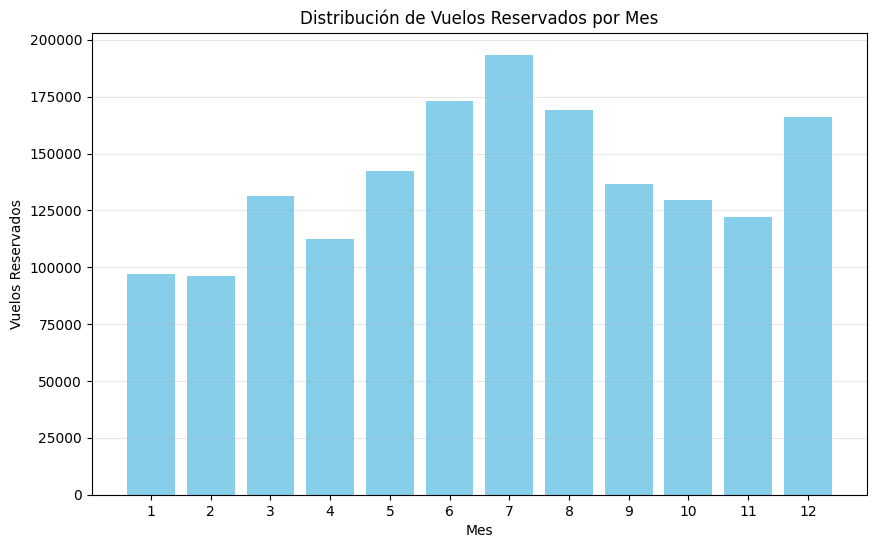

In [31]:
vuelos_por_mes = df_merged.groupby('Month')['Flights Booked'].sum()

plt.figure(figsize=(10, 6))
plt.bar(vuelos_por_mes.index, vuelos_por_mes.values, color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')
plt.title('Distribución de Vuelos Reservados por Mes')
plt.xticks(range(1, 13))
plt.grid(axis='y', alpha=0.3)
plt.show()

En verano y en Navidad parece que hay mas vuelos

# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes? Usamos un disgrama de dispersion

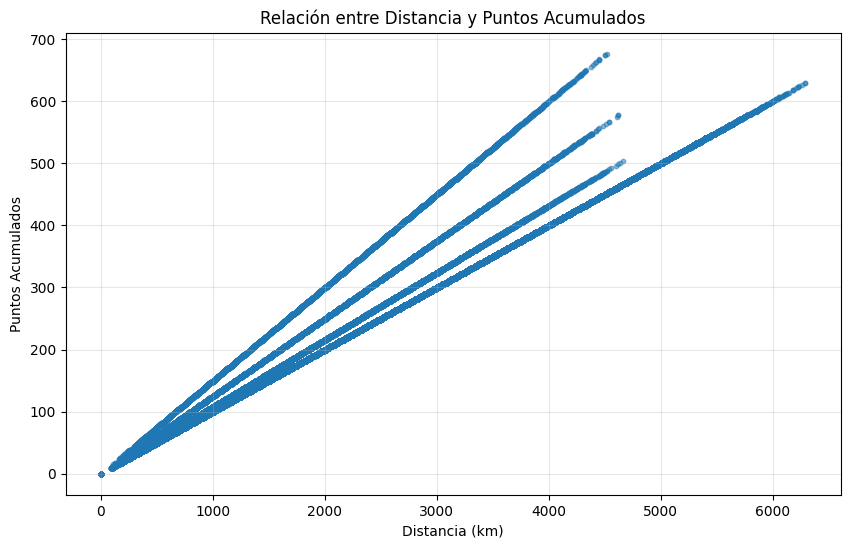

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Distance'], df_merged['Points Accumulated'], alpha=0.5, s=10)
plt.xlabel('Distancia (km)')
plt.ylabel('Puntos Acumulados')
plt.title('Relación entre Distancia y Puntos Acumulados')
plt.grid(alpha=0.3)
plt.show()

Aparece una relacion muy fuerte, a mayor distancia as puntos. El ehco de que aparezcan 4 líneas con diferente pendiente parece que da pie a pensar que hay diferentes formas de acumular puntos

 # 3. ¿Cuál es la distribución de los clientes por provincia o estado?

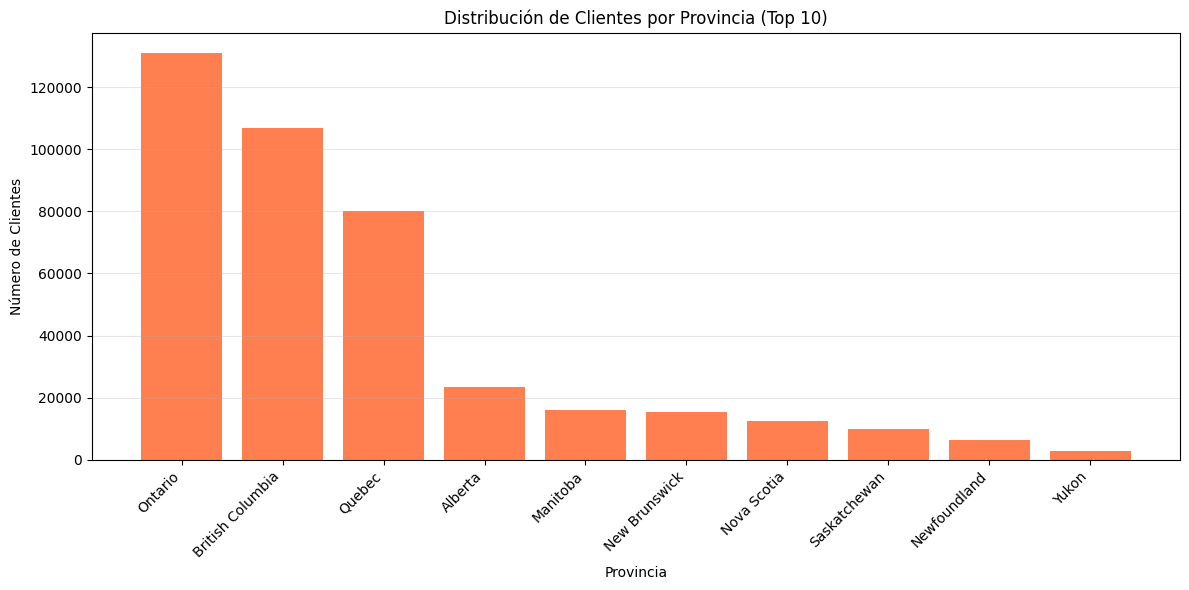

In [33]:
provincia_counts = df_merged['Province'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(provincia_counts.index, provincia_counts.values, color='coral')
plt.xlabel('Provincia')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes por Provincia (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

APrece que las provincias con mas poblacion tienen mas clientes

# 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

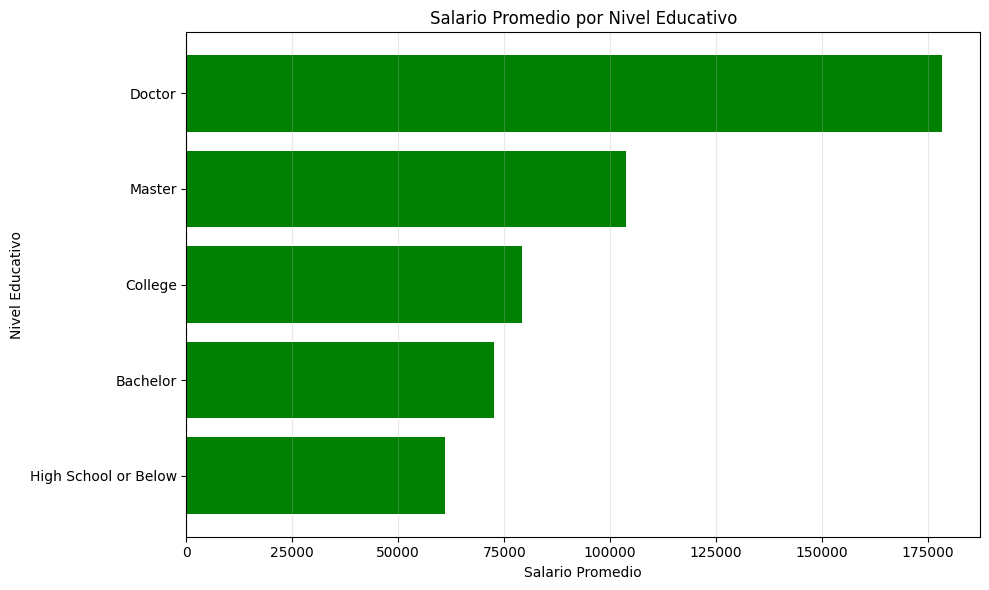

In [34]:
salario_educacion = df_merged.groupby('Education')['Salary'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.barh(salario_educacion.index, salario_educacion.values, color='green')
plt.xlabel('Salario Promedio')
plt.ylabel('Nivel Educativo')
plt.title('Salario Promedio por Nivel Educativo')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

A mayores estudios, mayores salarios medios

# 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

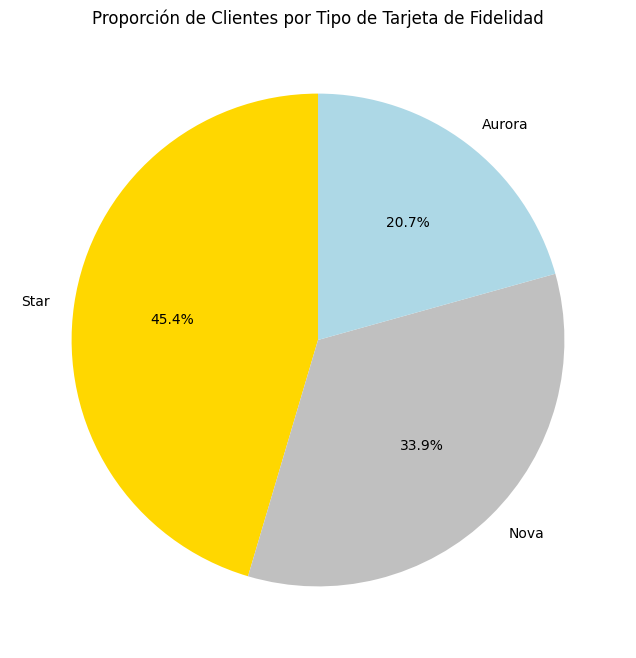

In [35]:
tarjeta_counts = df_merged['Loyalty Card'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(tarjeta_counts.values, labels=tarjeta_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'silver', 'lightblue'])
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')
plt.show()

# 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

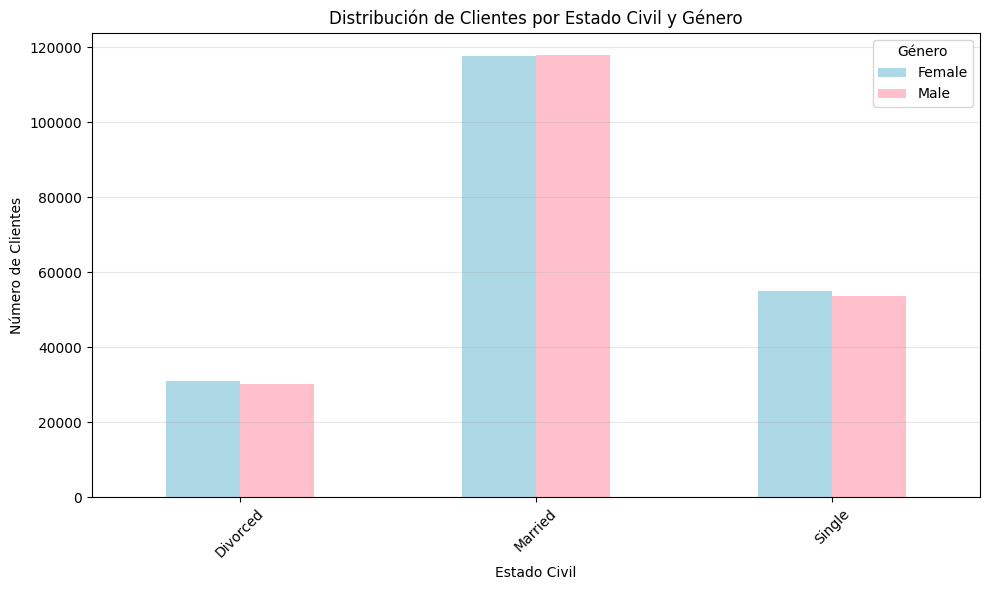

In [36]:
estado_genero = df_merged.groupby(['Marital Status', 'Gender']).size().unstack()

estado_genero.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'pink'])
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Lo que te decía arriba, poco divorciado para tanto casado

## FASE IV: Evaluación de diferencias en Reservas de Vuelos por Nivel Educativo

# Primero creamos un nuevo DF con solo las columnas que queremos education y flights booked

In [38]:
df_education = df_merged[['Flights Booked', 'Education']].copy()
df_education.head()

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor


No parece que haya nulos pero lo compruebo

In [39]:
df_education.isnull().sum()

Flights Booked    0
Education         0
dtype: int64

# Agrupamos por Education y calculamos estadísticas

In [40]:

estadisticas_education = df_education.groupby('Education')['Flights Booked'].agg(['mean', 'std', 'count'])
estadisticas_education

,mean,std,count
Education,,,
Bachelor,4.091093,5.216995,253752
College,4.153012,5.242136,102672
Doctor,4.146281,5.250093,17856
High School or Below,4.155777,5.234551,19008
Master,4.184014,5.210294,12336


EL nivel educativo no parece influir significativamente